In [1]:
import numpy
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline  

In [123]:
fn = '../perseus_HSC_morphologies - ds9.csv'
data = numpy.loadtxt(fn, delimiter=",", skiprows=2, usecols=(2,3,5,29,28),
                    converters = {28: lambda s: float(s.strip() or 0)})
#print data

patch = data[:,4]
in_hsc = data[:,4] > 0
hsc = data[in_hsc]

is_interacting = (hsc[:,3]==1)
interacting = hsc[is_interacting]

c_ra = 49.9506671
c_dec = 41.5116961
cos_dec = numpy.cos(numpy.radians(c_dec))
r = numpy.hypot((hsc[:,0]-c_ra)*cos_dec, hsc[:,1]-c_dec)
#print r

# Spatial distribution of interacting galaxies
Where interacting means the presence of shells and/or signs of a merger and/or tidal debris

/usr/lib64/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


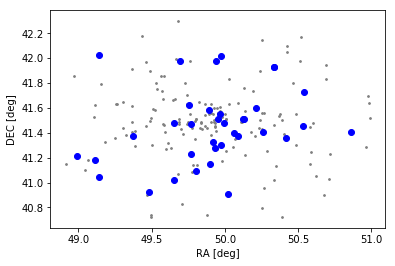

In [4]:
fig = pl.figure()
ax = fig.add_subplot(111)
#ax.set_xlim((53,47))
#ax.set_ylim((39,44))



#ax.set_xlim((51,49))
#ax.set_ylim((40.8,42.2))
ax.set_xlabel("RA [deg]")
ax.set_ylabel("DEC [deg]")

ax.scatter(hsc[:,0], hsc[:,1], s=3, c='grey')

ax.scatter(interacting[:,0], interacting[:,1], c='blue')

fig.show()

In [116]:
# check if interacting galaxies have different spatial distribution
from scipy import stats
ks_ra = stats.ks_2samp(hsc[:,0], interacting[:,0])
ks_dec = stats.ks_2samp(hsc[:,1], interacting[:,1])
ks_vel = stats.ks_2samp(hsc[:,2], interacting[:,2])

ks_r = stats.ks_2samp(r, r[is_interacting])

print "RA:                     ", ks_ra
print "DEC:                    ", ks_dec
print "redshift:               ", ks_vel
print "cluster-centric distance", ks_r

# results are KS-metric, probability for origin in same distribution

RA:                      Ks_2sampResult(statistic=0.12094017094017095, pvalue=0.73828538161407731)
DEC:                     Ks_2sampResult(statistic=0.16666666666666669, pvalue=0.33727556001018916)
redshift:                Ks_2sampResult(statistic=0.1316239316239316, pvalue=0.63723863427119842)
cluster-centric distance Ks_2sampResult(statistic=0.083760683760683768, pvalue=0.97843648029737362)


# Distribution of infalling galaxies

velocity difference for infallers is assumed to be +/- 1500...2500 relative to the cluster central velocity (5350 km/s). This means there is a low-velocity window (falling in from the back) and a high-velocity window (falling into the cluster from the front). These are shown in blue and red in the plot below. 

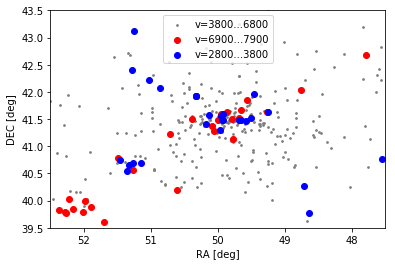

In [117]:
fig = pl.figure()
ax = fig.add_subplot(111)
#ax.set_xlim((51,49))
#ax.set_ylim((40.8,42.2))
ax.set_xlim((52.5,47.5))
ax.set_ylim((39.5,43.5))
ax.set_xlabel("RA [deg]")
ax.set_ylabel("DEC [deg]")

ax.scatter(data[:,0], data[:,1], s=3, c='grey', label="v=3800...6800")

infalling_highvel = data[ (data[:,2] > 6900) & (data[:,2] < 7900) ]
infalling_lowvel = data[ (data[:,2] > 2800) & (data[:,2] < 3800) ]

ax.scatter(infalling_highvel[:,0], infalling_highvel[:,1], c='red', label="v=6900...7900")
ax.scatter(infalling_lowvel[:,0], infalling_lowvel[:,1], c='blue', label='v=2800...3800')
ax.legend(loc='upper center')

fig.show()

In [7]:
# check for distribution 


# Include and compare WISE photometry for interacting and non-interacting galaxies

Plots below show a histogram of log(flux) as measured in apertures around the source positions, without regard of actual detections (hence many "detections" or rather measurements with <1 sigma). Solid histograms show the distribution of all galaxies, with hashed histograms showing the distribution for interacting galaxies. Red arrows show the 1-sigma detection limit, with the blue arrows pointing at the 3-sigma limit. 

Mixed in the output are results from a KS-test comparing the fluxes from the full and interacting galaxies sub-samples. Probability for the W3 flux to be drwan from the same underlying distribution are ~5%, making this a ~2 sigma signal, with all other bands showing even less of a difference. 

Note, however, that the signal comparing interacting to non-interacting galaxies is likely more significant, as the full sample by definition includes the interacting galaxies as well, diluting the results from the KS test. 

Also shown as red data points are, for each of the flux bin, the fraction of galaxies classified as interacting. This nicely shows that the interacting galaxies dominate the high-flux part of the distribution. I am not sure to what degree this is driven by selection effects in the sense that more luminous galaxies make it easier to detect signs of interaction, either because features are more prominent or more long-lived.

In [119]:
# include some wise photometry
fn_wise3 = "../photometry_wise3.cat"
wise3 = numpy.loadtxt(fn_wise3)
# print wise3.shape, data.shape

wise4 = numpy.loadtxt("../photometry_wise4.cat")
wise2 = numpy.loadtxt("../photometry_wise2.cat")
wise1 = numpy.loadtxt("../photometry_wise1.cat")

w3 = wise3[:, -2:]
# print w3.shape

wise = numpy.array([wise1[:,-2], wise1[:,-1],
                    wise2[:,-2], wise2[:,-1],
                    wise3[:,-2], wise3[:,-1],
                    wise4[:,-2], wise4[:,-1],
                    wise3[:,1], wise3[:,2]]).T
# print wise.shape
numpy.savetxt("wise_merged.cat", wise)


median fluxes: FULL=  3914.45
        INTERACTING=  6624.13


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:27: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:58: RuntimeWarning: invalid value encountered in divide


fraction of interacting galaxies 19.6078431373
median fluxes: FULL=  1533.32
        INTERACTING=  2639.55
fraction of interacting galaxies 19.6078431373
median fluxes: FULL=   861.43
        INTERACTING=  1429.04
fraction of interacting galaxies 22.0
median fluxes: FULL=    23.34
        INTERACTING=    67.43
fraction of interacting galaxies 22.3140495868


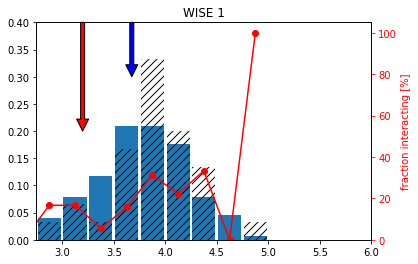

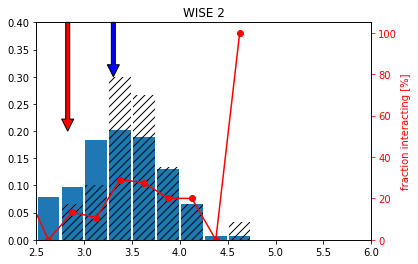

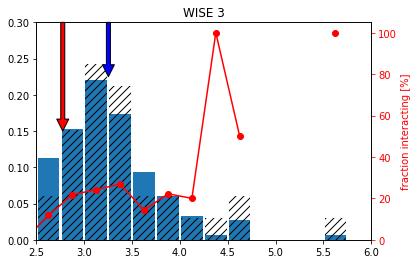

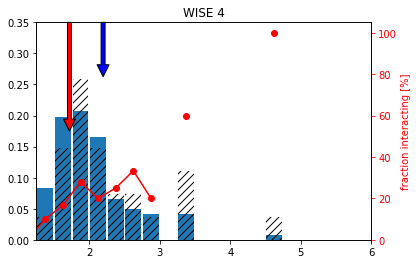

In [120]:
# compare the W3 fluxes of interacting galaxies with that of all galaxies

for wiseband in range(4):

    w3_full = wise[in_hsc][:, wiseband*2:wiseband*2+2]
    _w = w3_full[:,0]
    _w[_w<=0] = 0.
    w3_interacting = w3_full[is_interacting]
    #print w3_full.shape, w3_interacting.shape
    ks_w3 = stats.ks_2samp(w3_full[:,0], w3_interacting[:,0])
    # print ks_w3

    print "median fluxes: FULL= %8.2f" % (numpy.median(w3_full[:,0]))
    print "        INTERACTING= %8.2f" % (numpy.median(w3_interacting[:,0]))

    fig = pl.figure()
    ax = fig.add_subplot(111)

    n_bins = 24
    max_flux = 6
    w3_hist,_x = numpy.histogram(numpy.log10(w3_full[:,0]), bins=n_bins, range=(0,max_flux))
    x = 0.5*(_x[:-1]+_x[1:])
    w3_hist_n = w3_hist.astype(numpy.float) / numpy.sum(w3_hist)
    #print w3_hist

    #print x, x.shape, w3_hist.shape
    w3i_hist,_ = numpy.histogram(numpy.log10(w3_interacting[:,0]), bins=n_bins, range=(0,max_flux))
    #print w3i_hist
    w3i_hist_n = w3i_hist.astype(numpy.float) / numpy.sum(w3i_hist)

    peak = numpy.max([w3i_hist.astype(numpy.float)/numpy.sum(w3i_hist),
                      w3_hist.astype(numpy.float)/numpy.sum(w3_hist)])
    inc = 0.05
    y_max = int(numpy.ceil(1.2*peak/inc)) * inc
    ax.set_ylim((0, y_max))
    # print peak
    
    #ax.bar(x, w3_hist)
    #print len(x), x.shape, len(w3_hist)
    binwidth = 0.9*(x[1]-x[0])
    ax.bar(x,w3_hist_n,  width=binwidth)
    ax.bar(x,w3i_hist_n, width=binwidth, hatch="///", color='none')
    # ax.bar(x,w3_hist_n, yerr=numpy.sqrt(w3_hist)/numpy.sum(w3_hist), width=0.4)
    # ax.bar(x,w3i_hist_n, yerr=numpy.sqrt(w3i_hist)/numpy.sum(w3i_hist), width=0.4, hatch="///", color='none')
    
    one_sigma = w3_full[0,1]
    #y_max = 0.3
    det_limit = numpy.log10(one_sigma)
#     ax.arrow(det_limit, y_max, 0, -0.5*y_max, 
#              length_includes_head=True,
#              head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.annotate("",  xytext=(det_limit, y_max), xy=(det_limit, 0.5*y_max),
               arrowprops=dict(facecolor='red', shrink=0.0),)
    ax.annotate("",  xytext=(det_limit+numpy.log10(3), y_max), xy=(det_limit+numpy.log10(3), 0.75*y_max),
               arrowprops=dict(facecolor='blue', shrink=0.0),)
    
    ax2 = ax.twinx()
    ax2.plot(x, w3i_hist.astype(numpy.float)/w3_hist*100., 'ro-')
    ax2.set_ylabel('fraction interacting [%]', color='r')
    ax2.tick_params('y', colors='r')
    ax2.set_ylim((0,105.))
    print "fraction of interacting galaxies", numpy.sum(w3i_hist)*100./numpy.sum(w3_hist)
    #ax.hist(numpy.log10(w3_full[:,0]), bins=12, range=(0,6), normed=True)
    #ax.hist(numpy.log10(w3_interacting[:,0]), bins=12, range=(0,6), normed=True)

    binsize = x[1]-x[0]
    x_lim = int(numpy.floor((det_limit-binsize)/binsize))*binsize
    ax.set_xlim((x_lim, max_flux))

    ax.set_title("WISE %d" % (wiseband+1))
    fig.show()